In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data
eigenvalues = pd.read_csv('reduced_model_ETC_core_20240816-155234_tfa_sampling_lambda_max.csv',index_col=0).T

# Read TFA Samples 
tfa_samples = pd.read_csv('reduced_model_ETC_core_20240816-155234_tfa_sampling.csv')

In [2]:
# extract Concentration variables -> LC_
concentration_variables = [x for x in tfa_samples.columns if 'LC_' in x]

# Convert concentration variables from LC to mmol/L
tfa_samples[concentration_variables] = np.exp(tfa_samples[concentration_variables]) * 1e6

# Compute the max, mean, median on the eignevalues

eigenvalues['max'] = np.log10(-1/eigenvalues.iloc[:,:10].max(axis=1))
eigenvalues['mean'] = np.log10(-1/eigenvalues.iloc[:,:10].mean(axis=1) )
eigenvalues['median'] = np.log10(-1/eigenvalues.iloc[:,:10].median(axis=1))

# Align indices
eigenvalues.index = tfa_samples.index


In [3]:
eigenvalues

,0,1,2,3,4,5,6,7,8,9,max,mean,median
0,-0.000550,-0.000683,-0.000271,-0.000774,-0.001002,-0.000513,-0.000477,-0.000635,-0.000961,-0.000979,3.567682,3.164676,3.181323
1,-0.000475,-0.000618,-0.000240,-0.000706,-0.000789,-0.000447,-0.000419,-0.000564,-0.000858,-0.000891,3.620336,3.221482,3.228633
2,-0.000516,-0.000682,-0.000265,-0.000773,-0.000883,-0.000490,-0.000460,-0.000626,-0.000933,-0.000963,3.575994,3.180940,3.184156
3,-0.000697,-0.000936,-0.000355,-0.001144,-0.001073,-0.000660,-0.000625,-0.000841,-0.001318,-0.001339,3.450330,3.046314,3.051258
4,-0.000561,-0.000840,-0.000432,-0.001042,-0.000888,-0.000558,-0.000558,-0.001142,-0.001195,-0.001274,3.364856,3.071173,3.063413
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.000515,-0.000689,-0.000233,-0.000830,-0.000725,-0.000493,-0.000459,-0.000569,-0.000960,-0.001046,3.633362,3.185866,3.201331
996,-0.003641,-0.004541,-0.002062,-0.005294,-0.006512,-0.003282,-0.003146,-0.005131,-0.006351,-0.005653,2.685737,2.340915,2.315516
997,-0.003168,-0.004053,-0.001747,-0.005090,-0.006172,-0.002874,-0.002784,-0.004301,-0.005951,-0.005652,2.757726,2.378906,2.379100
998,-0.001630,-0.002189,-0.000933,-0.002881,-0.002535,-0.001519,-0.001478,-0.002322,-0.003240,-0.003278,3.030069,2.657441,2.646738


<Axes: >

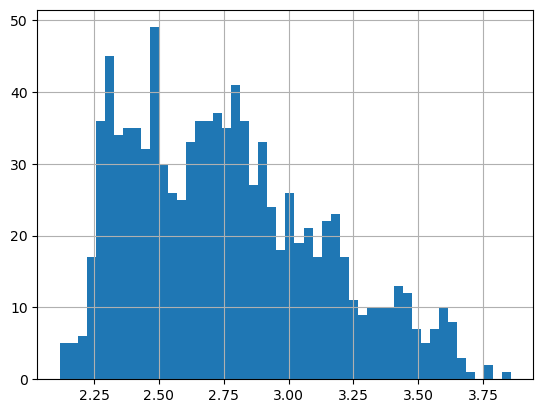

In [4]:
# Hist froma max eigenvalues
plt.figure()
eigenvalues['max'].hist(bins=50)

In [5]:
# Compute correlations between characteristics of the eigencalues and the concentration variables
correlations = pd.DataFrame()
for col in concentration_variables:
    correlations[col] = eigenvalues[['max','mean','median']].corrwith(tfa_samples[col], method='spearman')

correlations = correlations.T
# Drop NA values
correlations = correlations.dropna()

# Make a colum if all correlations are consistent
correlations['consistent'] = correlations.apply(lambda x: all(x > 0) or all(x < 0),axis=1)

# Drop inconsistent correlations

/opt/homebrew/Caskroom/miniconda/base/envs/skimpy-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/opt/homebrew/Caskroom/miniconda/base/envs/skimpy-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/opt/homebrew/Caskroom/miniconda/base/envs/skimpy-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_81571/2307467176.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

In [6]:
correlations

,max,mean,median,consistent
LC_o2_c,0.178219,0.229179,0.233826,True
LC_o2_m,-0.007116,-0.007410,-0.006660,True
LC_h_m,0.128189,0.150866,0.150186,True
LC_h_c,0.039422,0.086651,0.085057,True
LC_atp_c,-0.122172,-0.110280,-0.112511,True
...,...,...,...,...
LC_c6hydroxyacylcoa_m,-0.099797,-0.087910,-0.086381,True
LC_c6ketoacylcoa_m,-0.032450,-0.016069,-0.012271,True
LC_c4coa_m,-0.046205,-0.046380,-0.043541,True
LC_c4enoylcoa_m,-0.013738,-0.024844,-0.024909,True


<Axes: xlabel='max', ylabel='None'>

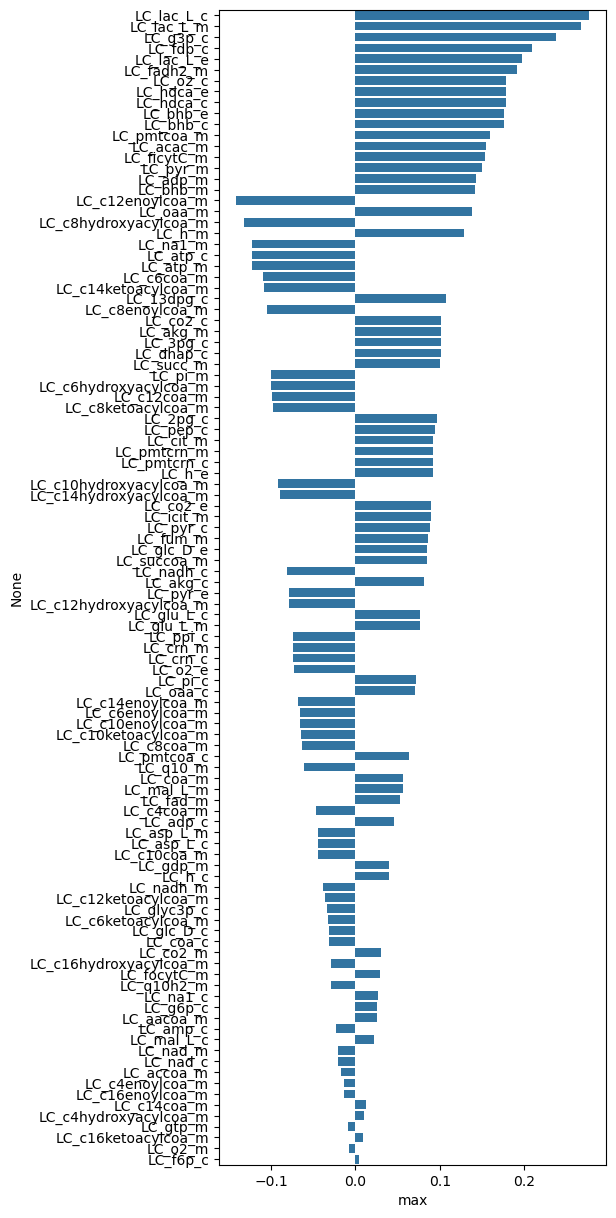

In [7]:
# Rank by absulute value of the max column
correlations['abs_max'] = correlations['max'].abs()

correlations = correlations.sort_values('abs_max',ascending=False)

# Plot the correlations as a bar plot
plt.figure(figsize=(5,15))
sns.barplot(data=correlations,x='max',y=correlations.index)

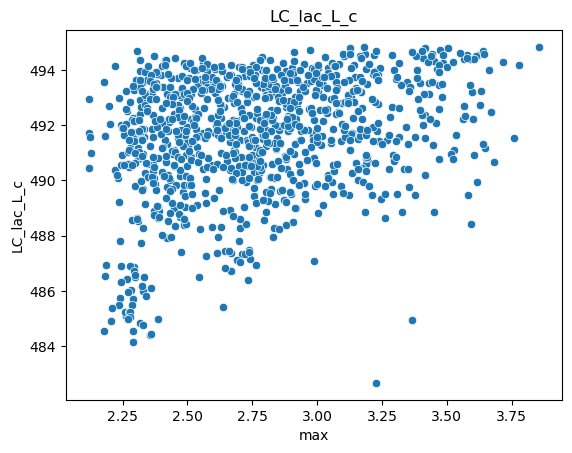

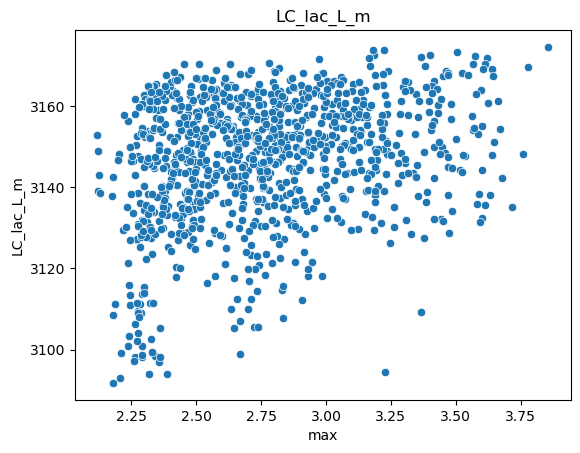

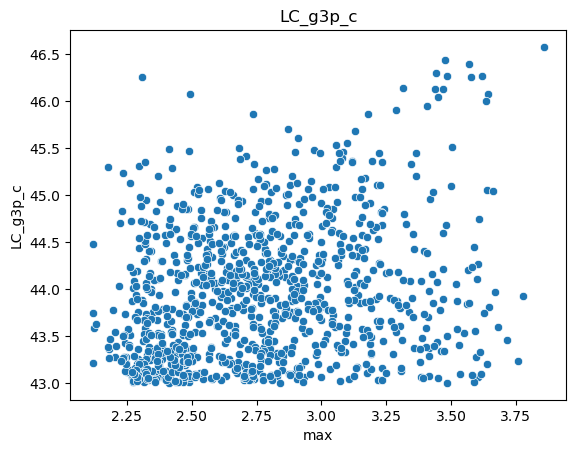

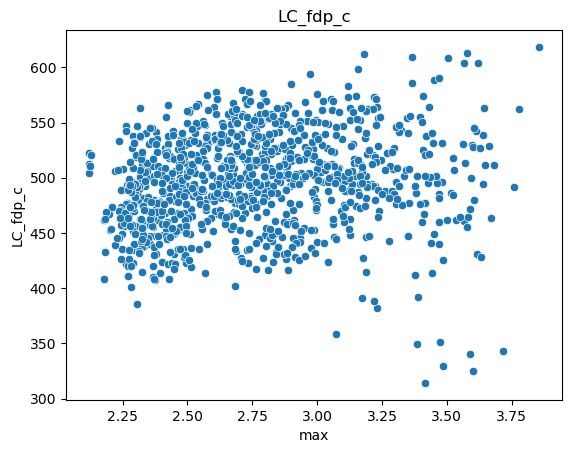

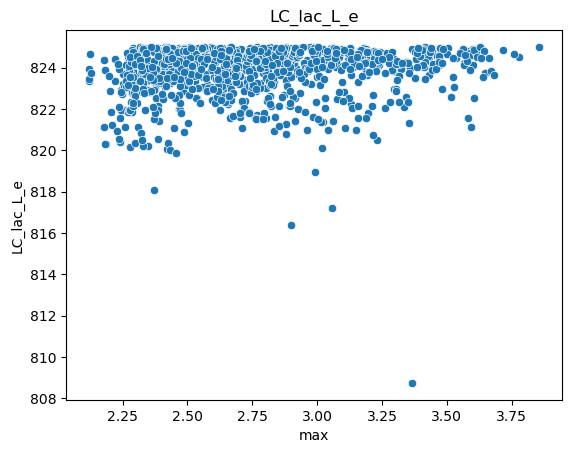

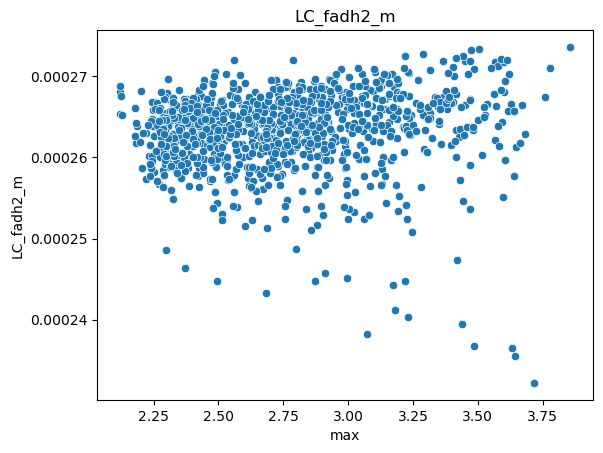

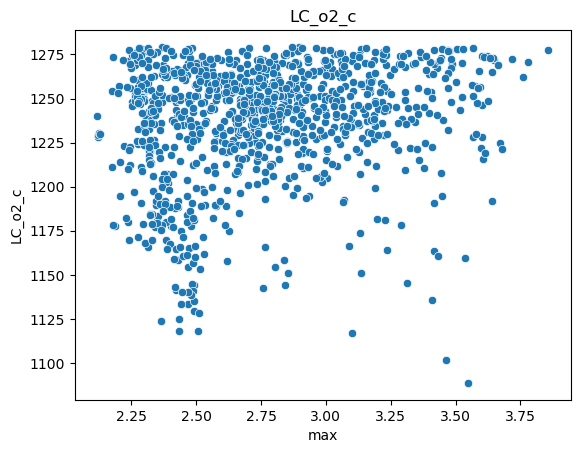

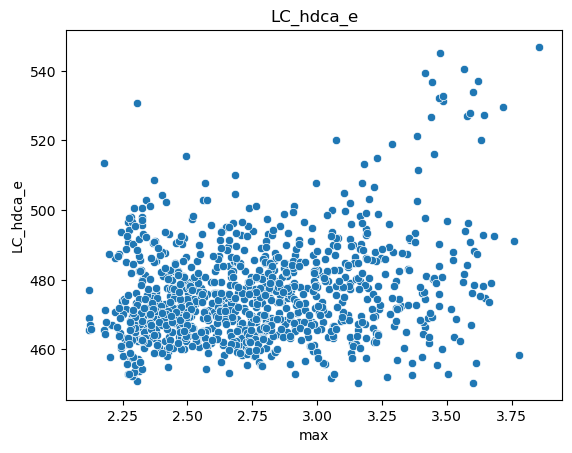

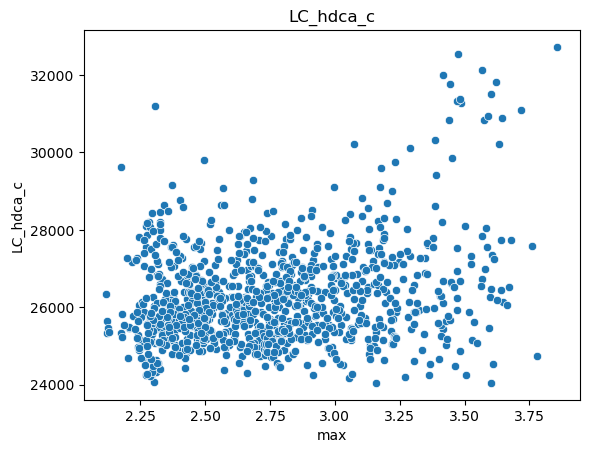

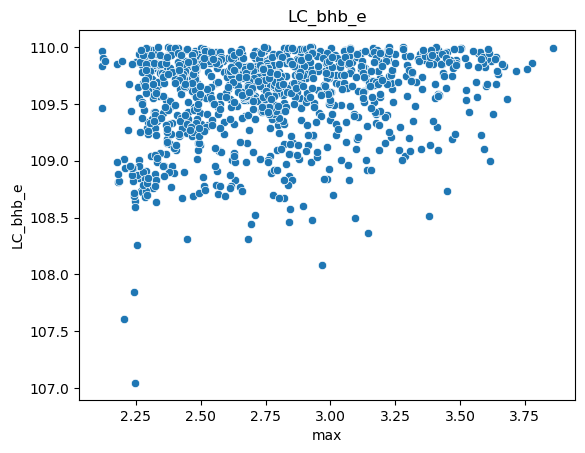

In [8]:
# Make a scatter plot of the max eigenvalue and the concentration variables that have the highest correlations 
# Top 10 

top_10 = correlations.head(10).index

for col in top_10:
    plt.figure()
    sns.scatterplot(x=eigenvalues['max'],y=tfa_samples[col])
    plt.title(col)

/opt/homebrew/Caskroom/miniconda/base/envs/skimpy-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/opt/homebrew/Caskroom/miniconda/base/envs/skimpy-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


<Axes: xlabel='max', ylabel='None'>

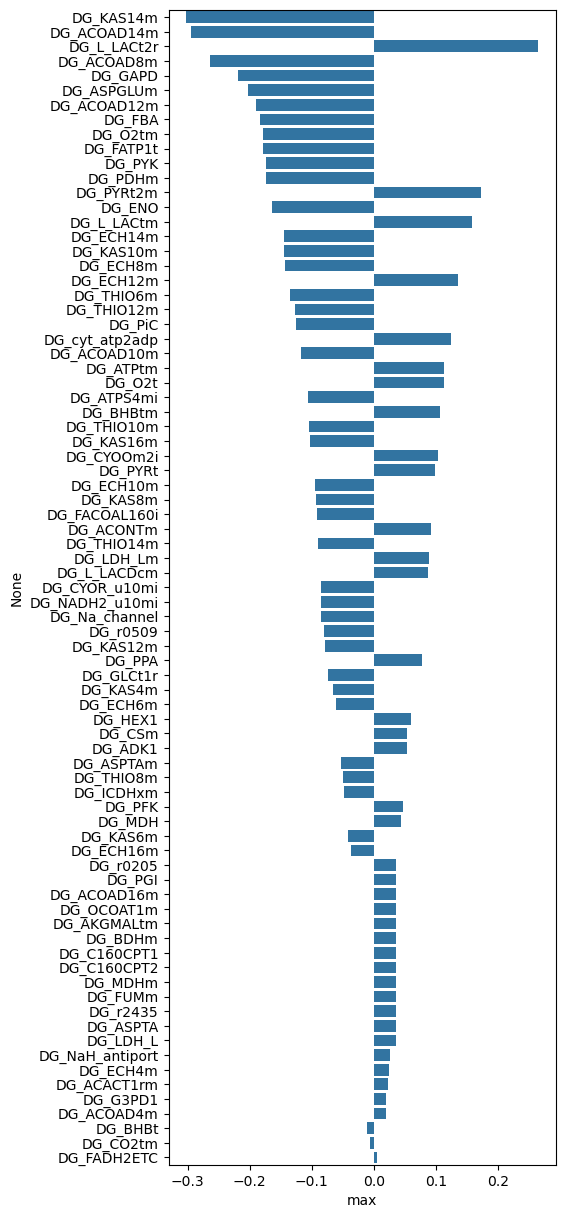

In [9]:
# Thermochemical correlations
thermodynamic_variables = [x for x in tfa_samples.columns if 'DG_' in x]

# Compute correlations between characteristics of the eigencalues and the concentration variables
correlations_thermo = pd.DataFrame()
for col in thermodynamic_variables:
    correlations_thermo[col] = eigenvalues[['max','mean','median']].corrwith(tfa_samples[col], method='spearman')

correlations_thermo = correlations_thermo.T
# Drop NA values
correlations_thermo = correlations_thermo.dropna()

# Make a colum if all correlations are consistent
correlations_thermo['consistent'] = correlations_thermo.apply(lambda x: all(x > 0) or all(x < 0),axis=1)

# Drop inconsistent correlations
correlations_thermo = correlations_thermo[correlations_thermo['consistent']]

# Sort by abs max
correlations_thermo['abs_max'] = correlations_thermo['max'].abs()

correlations_thermo = correlations_thermo.sort_values('abs_max',ascending=False)



# Plot the correlations as a bar plot
plt.figure(figsize=(5,15))
sns.barplot(data=correlations_thermo,x='max',y=correlations_thermo.index)

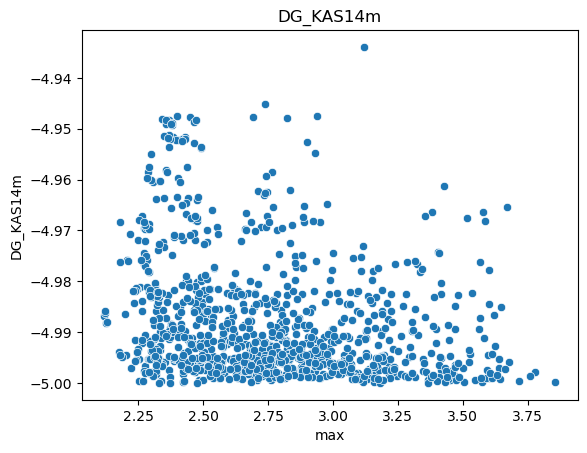

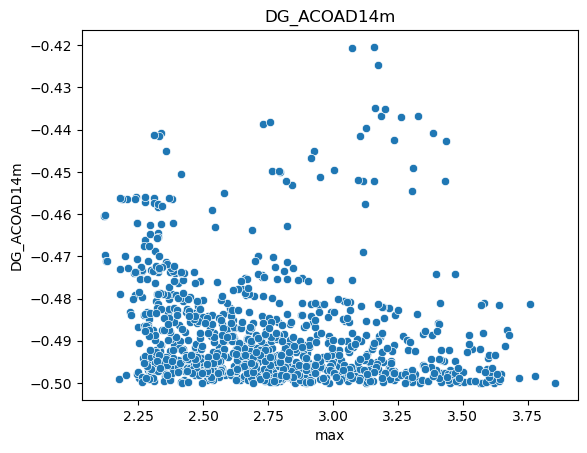

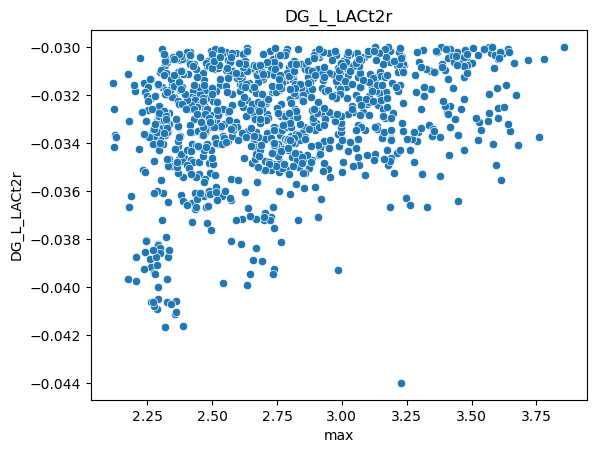

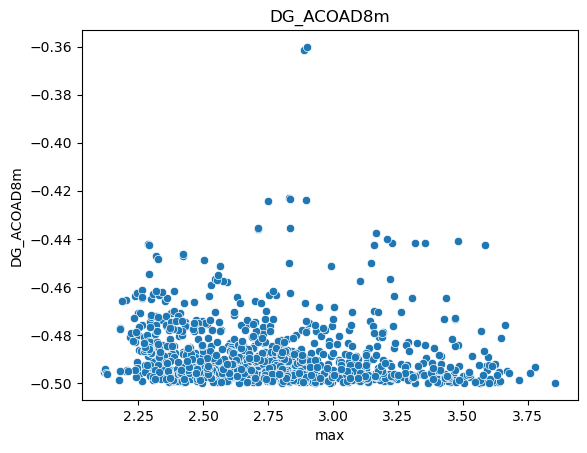

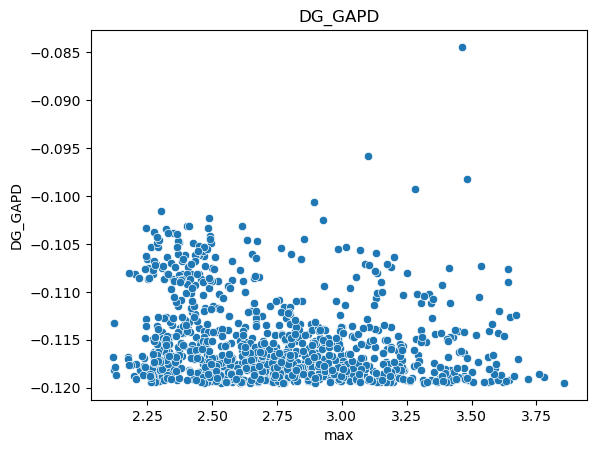

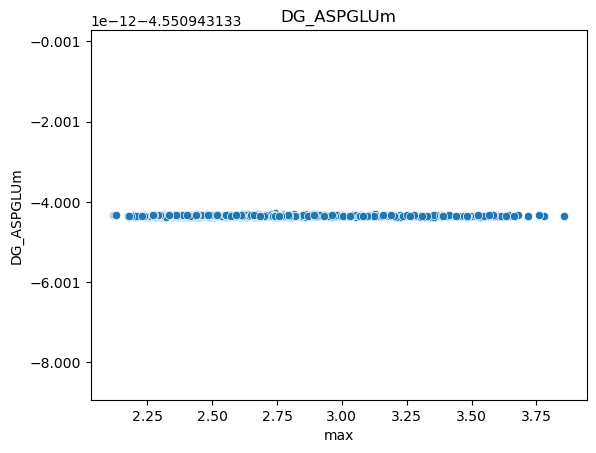

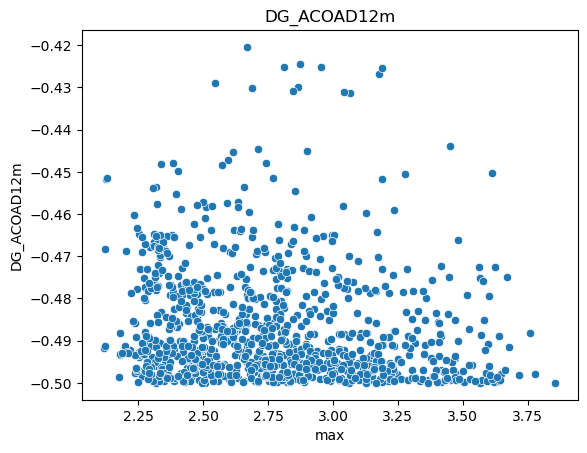

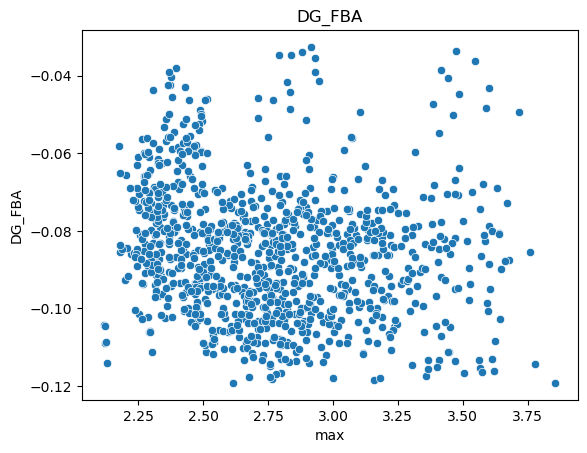

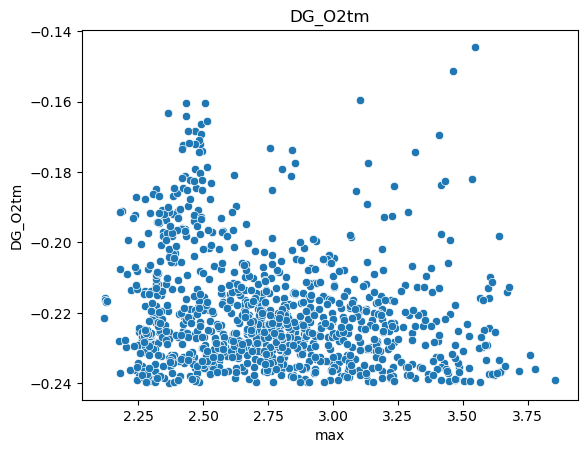

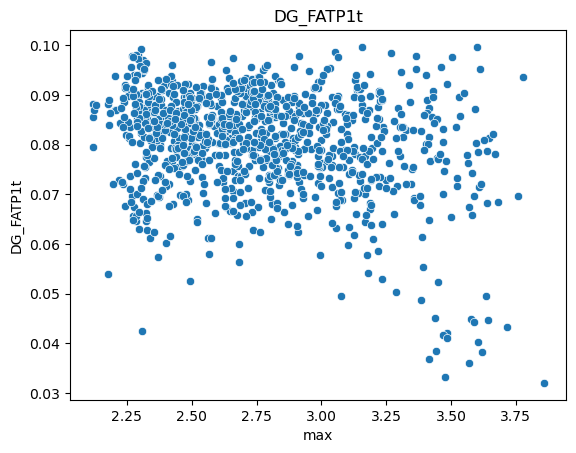

In [10]:
# Make a scatter plot of the max eigenvalue and the concentration variables that have the highest correlations
# Top 10

top_10_thermo = correlations_thermo.head(10).index

for col in top_10_thermo:
    plt.figure()
    sns.scatterplot(x=eigenvalues['max'],y=tfa_samples[col])
    plt.title(col)